# <b> <font color = blue>Gradient Descent for Logistic Regression<font> </b>

In [1]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import sys 
sys.path.append('Material_By_DeepLearning/')
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./Material_By_DeepLearning/deeplearning.mplstyle')
'run sucessfully'

'run sucessfully'

## Data set 
Let's start with the same two feature data set used in the decision boundary lab.

In [2]:
X_Train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
Y_Train = np.array([0, 0, 0, 1, 1, 1])

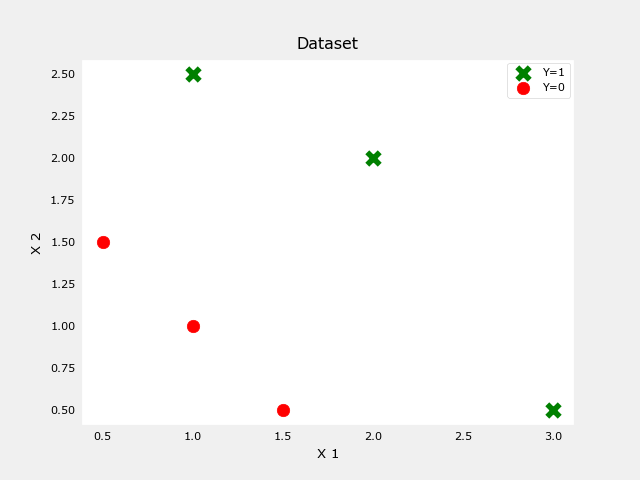

In [3]:
#lets make a function to plot a data
def plot_data(ax,x,y):
    
    pos = y==1
    neg = y==0
    ax.scatter(x[pos,0],x[pos,1],marker='x',label="Y=1",c="green",s=80)
    ax.scatter(x[neg,0],x[neg,1],marker='o',label="Y=0",c="red",s=80)
    ax.set_title("Dataset")
    ax.set_xlabel("X 1")
    ax.set_ylabel("X 2")
    plt.legend()
    plt.show()

_,ax = plt.subplots(1,1)
plot_data(ax,X_Train,Y_Train)


In [4]:
# lets make a sigmoid function 
def Sigmoid(z):
    return 1/(1 + np.exp(-z))

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 
 
<a name='ex-02'></a>
#### Code Description

The algorithm for `Compute_Cost` loops over all the examples calculating the loss for each example and accumulating the total.

Note that the variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.


In [5]:
def Compute_Cost(x, y ,w ,b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    cost = 0
    row = x.shape[0]
    for i in range(0,row):
        
        z = np.dot(w,x[i])+b
        f_wb = Sigmoid(z)
        
        cost += ((y[i])*(np.log(f_wb))) + (1-y[i])*(np.log(1-f_wb))
        
    cost = -(cost/row)
    return cost

In [6]:
# lets lest the cost function
X_temp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_temp = np.array([0, 0, 0, 1, 1, 1])

w = np.array([1,1])
b = -3
print("Cost is :",Compute_Cost(X_temp, y_temp, w, b,))

#the ideal output must be 
# Cost is : 0.36686678640551745

Cost is : 0.36686678640551745


## Logistic Gradient Descent

Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


In [7]:
def Compute_Gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    
    
    row,col = x.shape 
        
    dj_dw = np.zeros_like(w)
        
#     print(dj_dw.shape)
    dj_db = 0
    for i in range(0,row):
        z = np.dot(w,x[i])+b
        f_wb = sigmoid(z)
        error = f_wb - y[i]
        
        #for dj_dw because there are two features hebcxe it required a  loop to get derivation for everyu single w of each individual feature 
        
        for j in range (col):
            dj_dw[j] += error * x[i,j] 
        
        #now dj_db
        dj_db += error
        
    #final dj_dw and dj_db
    dj_dw = dj_dw/row
    dj_db = dj_db/row
    
    return dj_dw,dj_db

print("run sucessfully")

run sucessfully


In [8]:
#lets test the output 
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp , dj_db_tmp= Compute_Gradient(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

# ideal oputput must be 
# dj_db: 0.49861806546328574
# dj_dw: [0.498333393278696, 0.49883942983996693]

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [9]:
def Compute_Gradient_Descent(x, y, w, b, alpha, iteration):
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    
    j_History=[]
    
    for i in range (0, iteration):
        # let's take dj_dw and dj_db 
        dj_dw, dj_db = Compute_Gradient(x, y, w, b)

        #updating paramters for the w
        #using loop beacuse each parametre of each feature needs to update 
        w = w - alpha*(dj_dw)
        
        #updating parameter b
        b -= alpha*(dj_db)
        
        # so now it's time to store cost of an function 
        if i<10000:
            j_History.append(Compute_Cost(x, y ,w ,b))
        
        if (i%1000 == 0):
            print(f"the iteration {i} has cost: {j_History[-1]}")
    
    return w, b, j_History

In [10]:
w_tmp  = np.zeros_like(X_Train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = Compute_Gradient_Descent(X_Train, Y_Train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

the iteration 0 has cost: 0.684610468560574
the iteration 1000 has cost: 0.1590977666870457
the iteration 2000 has cost: 0.08460064176930078
the iteration 3000 has cost: 0.05705327279402531
the iteration 4000 has cost: 0.04290759421682
the iteration 5000 has cost: 0.03433847729884557
the iteration 6000 has cost: 0.02860379802212006
the iteration 7000 has cost: 0.02450156960879306
the iteration 8000 has cost: 0.02142370332569295
the iteration 9000 has cost: 0.019030137124109114

updated parameters: w:[5.28 5.08], b:-14.222409982019837


y:  [0, 2.6930107562540697]
x:  [2.8007035962501785, 0]


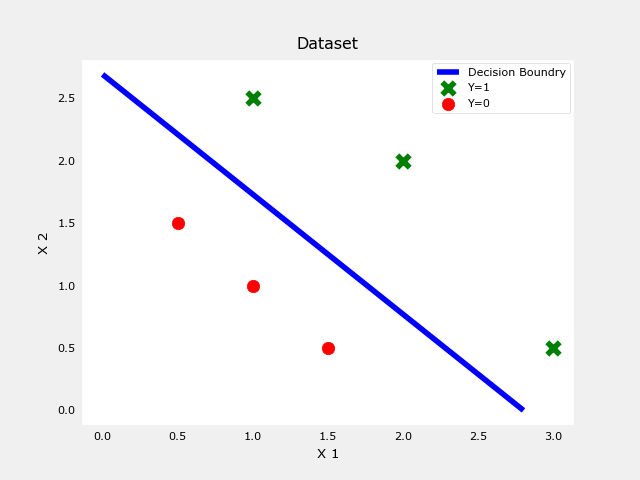

In [11]:
#lets plot the data 


#ploting the decision boundry
y = [0,-(b_out/w_out[0])]
x = [-(b_out/w_out[1]),0]

print("y: ",y)
print("x: ",x)

_,ax = plt.subplots(1,1)
ax.plot(x,y,c="blue",label="Decision Boundry")
ax.legend()

# original data
plot_data(ax,X_Train,Y_Train)
